#Classification using Support Vector Machine
Please do not import any other python library except numpy and matplotlib 

In [286]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Generating Random linearly separable data


In [299]:
def generate_data(j):
  data = [[np.random.rand(), np.random.rand()] for i in range(j)]
  for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
      data[i].append(-1)
    else:
      data[i].append(1)
  # data = data+'j' list to str not possible
  # print(data)
  return np.array(data)

#Visualizing the above data

In [300]:
def plot_points(data_points_with_label):
  for x, y, l in data_points_with_label:
    if l == 1: 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(x, y, c=clr)


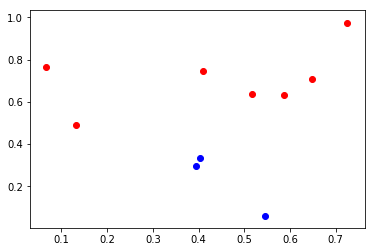

In [301]:
data10 = generate_data(10)
plot_points(data10)
                    

#SVM Classifier
Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.

In [302]:
def svm_function(x, y, epoch, l_rate):
    w = np.zeros(len(x[0]))
    out = []
    for e in range(epoch):
        for i in range(len(x)):
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
            else:
                w = w + l_rate * (-2*(1/epoch)*w)
    for i, val1 in enumerate(x):
        out.append(np.dot(x[i], w))
    return w

#Run SVM Classifier

In [303]:
def svm_classifier(data_points):
  data = np.asarray(data_points)
  X = data[:,:2]
  ones = np.ones([len(X[:,0]), 1])
  X = np.hstack((X, ones))
  Y = data[:,2]
  w = svm_function(X, Y, 10000, 1)
  # print(w)
  return w
svm_weights = svm_classifier(data10)

#Visualize the classifier
Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated
(0.5*x - y + 0.25). 

In [304]:
def classifier_visualization(w,data_points,my_plot,plot_title,show_weights=True,show_GT=True):
    print(w)
    if show_weights:
#         print(type(data_points))
        x_temp = data_points[:,0]
        x2 = np.linspace(x_temp.min()-0.5,x_temp.max()+0.5,100)
        y2 = -(w[0]*x2 + w[2])/w[1]
        my_plot.plot(x2,y2,'b',label='y1=w1*x+w0')
    if(show_GT):
        x1 = np.linspace(-0.5,1.5,100)
        y1 = 0.5*x1 + 0.25 
        my_plot.plot(x1,y1,'r',label='y2=0.5*x+0.25')
    my_plot.set_title(plot_title)
    my_plot.legend(loc='lower right',prop={'size':8})
    for x, y, l in data_points:
        if l == 1:
            clr = 'red'
        else: 
            clr = 'blue'
        my_plot.scatter(x, y, c=clr)
#     my_plot.xlim(0,1)
#     my_plot.ylim(0,1)
# plot_points(data10)
# classifier_visualization(svm_weights,data10)

Increase the number of data-points and observe number of epochs to converge. Draw plots showing data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

10
[-2.00618173 10.83914461 -5.03095824]
20
[-10.35429913  21.84556201  -6.34130532]
30
[-9.52996096 15.90205927 -3.93342271]
40
[-4.2923809  18.47640639 -6.09276956]
50
[-12.72137641  21.47318491  -4.55910869]
100
[-10.31960431  17.18784853  -3.94009479]


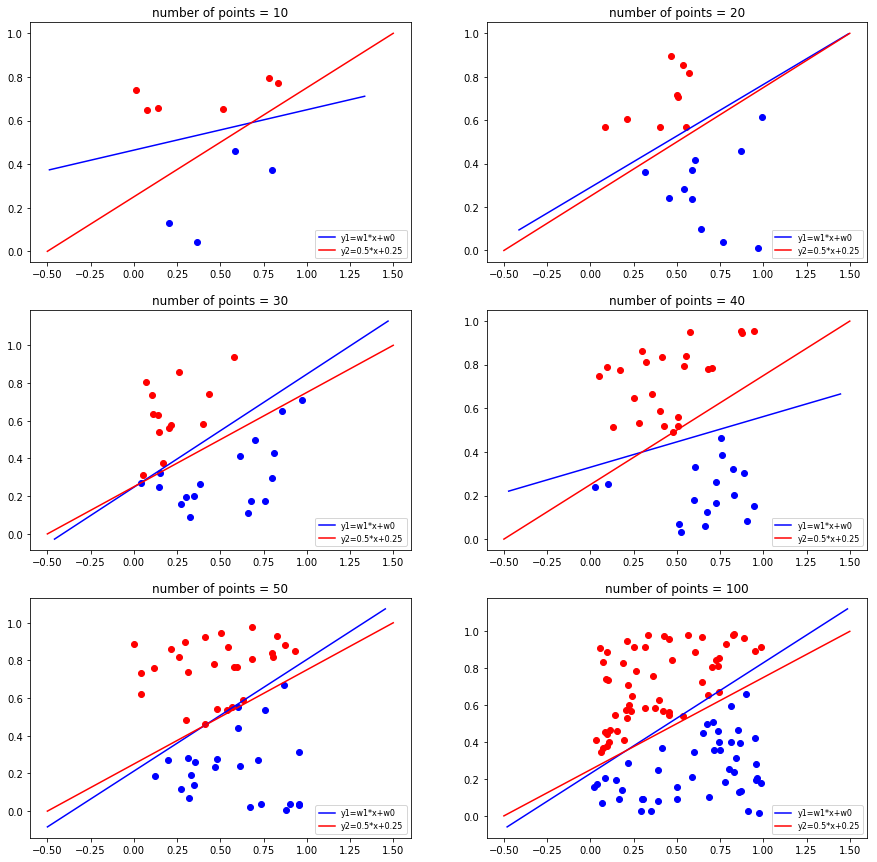

In [305]:
num_points = [10,20,30,40,50,100]
plot_rows, plot_cols = 3, 2
fig, plots =  plt.subplots(plot_rows, plot_cols,figsize=(15,15))
all_data = []

for i in range(len(num_points)):
    num_point = num_points[i]
    print(num_point)
    all_data.append(generate_data(num_point))
    svm_weights = svm_classifier(all_data[-1])
    classifier_visualization(svm_weights,all_data[-1],plots[i//plot_cols][i%plot_cols],"number of points = " + str(num_point))


#Perturbing the previously created  data
Add noise to the data and visualize the resulting classifier.




In [306]:
def perturb_data(data):
    perturbed_data = np.array(data)
    for i in range(len(data)):
        perturbed_data[i][0] += (np.random.rand() - 0.5) / 2.
        perturbed_data[i][1] += (np.random.rand() - 0.5) / 2.
    return perturbed_data

#Visualizing the perturbed Data

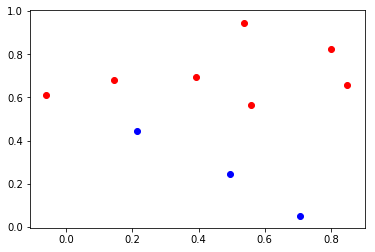

In [307]:
perturbed_data10 = perturb_data(data10)
plot_points(perturbed_data10)


#Visualize the classifier trained on noisy data
Plot actual seperating line and seperating line you got from svm_classifier. Do this for 10, 20, 30, 40, 50 and 100 data points. You can vary the scale of noise as well. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

10
[-11.09594257  21.7620128   -3.40016505]
20
[-4.07414871 18.17567359 -6.64388442]
30
[-7.00569802 12.33734793 -3.18690117]
40
[-0.58945945 11.44908428 -3.11143866]
50
[ 0.5935449  11.85593363 -5.48427832]
100
[-3.90084023  9.61630203 -2.83258323]


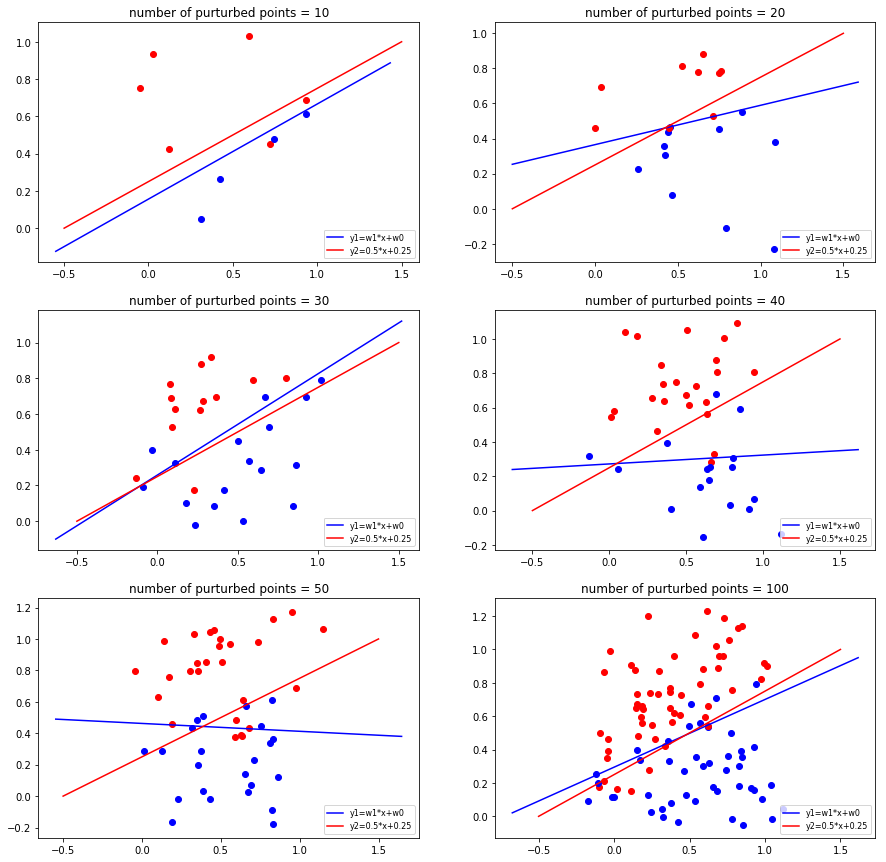

In [308]:
fig, p_plots =  plt.subplots(plot_rows, plot_cols,figsize=(15,15))
for i in range(len(all_data)):
    print(num_points[i])
    purturbed_data = perturb_data(all_data[i])
    svm_weights = svm_classifier(purturbed_data)
    classifier_visualization(svm_weights,purturbed_data,p_plots[i//plot_cols][i%plot_cols],"number of purturbed points = " + str(num_points[i]))


In [309]:
svm_weights

array([-3.90084023,  9.61630203, -2.83258323])

#Read the Random Non-linear data stored in CSV1 and visualize it

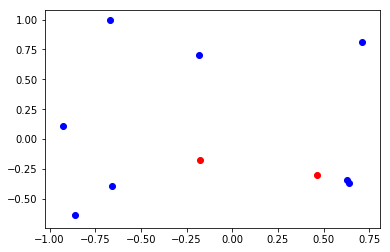

In [311]:
imported_data1 = np.genfromtxt('csv1.csv', delimiter=',')
for x, y, l in imported_data1:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)  

#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data
For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable. These features can be exponential, polynomial, trignometric or any other function of actual input features. For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2). 
Here you need to think of which hand-crafted features can be best suited for data given to you. Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'. 


In [312]:
    ################################################
    ### Write your code here for features###########
    ################################################
    e_c0 = np.exp(-1*(imported_data1[:,0]**2))
    e_c1 = np.exp(-1*(imported_data1[:,1]**2))

    ######################################################
    ### Write your code here for classification###########
    ######################################################
    X = np.transpose(np.array([e_c0,e_c1]))
    ones = np.ones([len(X[:,0]), 1])
    X = np.hstack((X, ones))
    Y = imported_data1[:,2]
    print("going")
    svm_weights = svm_function(X,Y,20000,1)
    print(svm_weights)
    print("completed")

going
[ 16.99245647  15.72904958 -27.00714086]
completed


#Visualize decision boundary
Here, as 'w' retuened by svm_function is (L+1) dimensional, you can not visualize it in the form of line in 2D. To visualize non-linear decision boundary in 2D, you can generate few hundred random data-points and can observe if classifier labels them +1 or -1. Then you can plot this points with different colors to get emperical decision boundary. Write the code for visualization of non-linear decision boundary in next cell.

[ 16.99245647  15.72904958 -27.00714086]
[ 16.99245647  15.72904958 -27.00714086]


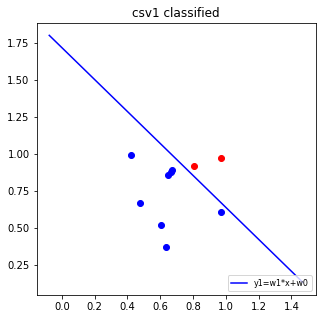

In [314]:
    ###################################
    ### Write your code here###########
    ###################################
    print(svm_weights)
    fig, plots1 =  plt.subplots(1, 1, figsize=(5,5))
    data_1 = np.array(X)
    data_1[:,2] = Y
    classifier_visualization(svm_weights,data_1,plots1,"csv1 classified",True,False)
    

#Read the Random Non-linear data stored in CSV2

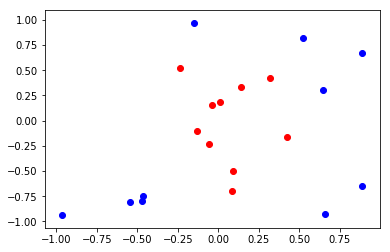

In [315]:
imported_data2 = np.genfromtxt('csv2.csv', delimiter=',')
for x, y, l in imported_data2:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x,y, c=clr)

#Train a SVM classifier on the non linear data by appropriate features and also visualise it

In [316]:
    ################################################
    ### Write your code here for features###########
    ################################################
    e_c0 = np.exp(-1*(imported_data2[:,0]**2))
    e_c1 = np.exp(-1*(imported_data2[:,1]**2))

    ######################################################
    ### Write your code here for classification###########
    ######################################################
    X = np.transpose(np.array([e_c0,e_c1]))
    ones = np.ones([len(X[:,0]), 1])
    X = np.hstack((X, ones))
    Y = imported_data2[:,2]
    print("going")
    svm_weights = svm_function(X,Y,100000,0.25)
    print(svm_weights)
    print("completed")

going
[ 13.88675754   8.74993765 -18.12775833]
completed


[ 13.88675754   8.74993765 -18.12775833]
[ 13.88675754   8.74993765 -18.12775833]


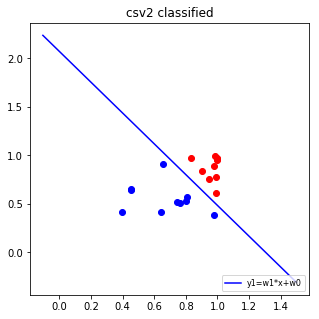

In [317]:
    ###################################
    ### Write your code here###########
    ###################################
    print(svm_weights)
    fig, plots1 =  plt.subplots(1, 1, figsize=(5,5))
    data_1 = np.array(X)
    data_1[:,2] = Y
    classifier_visualization(svm_weights,data_1,plots1,"csv2 classified",True,False)
    

#Read the Random Non-linear data stored in CSV3

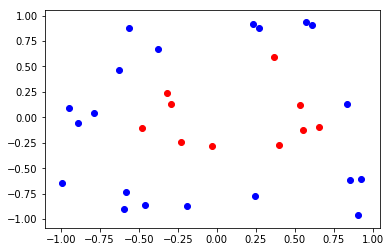

In [318]:
imported_data3 = np.genfromtxt('csv3.csv', delimiter=',')
for x, y, l in imported_data3:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)  


#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it

In [319]:
    ################################################
    ### Write your code here for features###########
    ################################################
    e_c0 = np.exp(-1*(imported_data3[:,0]**2))
    e_c1 = np.exp(-1*(imported_data3[:,1]**2))

    ######################################################
    ### Write your code here for classification###########
    ######################################################
    X = np.transpose(np.array([e_c0,e_c1]))
    ones = np.ones([len(X[:,0]), 1])
    X = np.hstack((X, ones))
    Y = imported_data3[:,2]
    print("going")
    svm_weights = svm_function(X,Y,100000,0.25)
    print(svm_weights)
    print("completed")

going
[ 29.75886585  25.97401623 -43.65060364]
completed


[ 29.75886585  25.97401623 -43.65060364]
[ 29.75886585  25.97401623 -43.65060364]


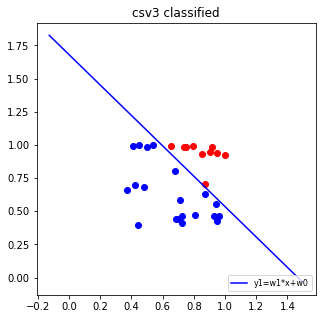

In [320]:
    ###################################
    ### Write your code here###########
    ###################################
    print(svm_weights)
    fig, plots1 =  plt.subplots(1, 1, figsize=(5,5))
    data_1 = np.array(X)
    data_1[:,2] = Y
    classifier_visualization(svm_weights,data_1,plots1,"csv3 classified",True,False)
    